In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys


In [2]:
# Allow imports from parent directory 
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im/35273613#35273613
#module_path = os.path.abspath(os.path.join(os.pardir))
module_path = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\'
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path

['',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\python36.zip',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\DLLs',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\agomez\\.ipython',
 'C:\\Users\\agomez\\Dropbox\\Harv

In [3]:
import time
import datetime

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
import warnings
import IPython.display
import scipy.stats
import networkx as nx
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Helvetica')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=16, linewidth=0.5)


from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from numpy.random import exponential, negative_binomial, randint, choice, binomial
from random import shuffle

import statsmodels.formula.api as smf



In [4]:
import EComm_0001_complexities 

In [5]:
# Paths
path_fig = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\figures\\'
path_data = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\data\\'
path_outputdata = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\outputdata\\'


# Setting the parameters of the Toy World

In [6]:
np.random.seed(1984)

In [7]:
# Number of countries
Nc = 200

# Number of products
Np = 5000

# Number of communities
K = 4


# Creating Cca and Ppa

In [8]:
Cca_df_wide, Ppa_df_wide = EComm_0001_complexities.create_toy_Cca_Ppa(Nc, Np, K)

In [9]:
(Cca_df_wide.shape, Ppa_df_wide.shape)

((200, 1595), (5000, 1595))

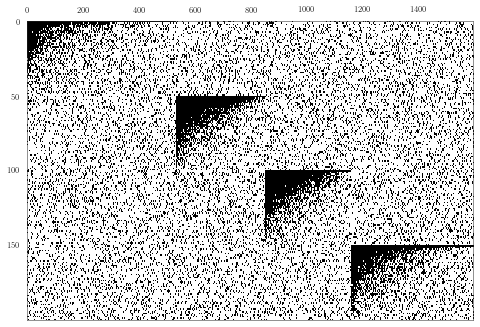

In [10]:
plt.spy(Cca_df_wide, aspect='auto')
plt.show()

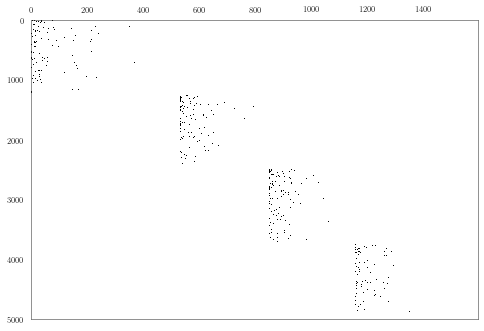

In [11]:
plt.spy(Ppa_df_wide,aspect='auto')
plt.show()

# Mcp matrix as the results of a production function (Leontief)

In [12]:
Mcp_raw = EComm_0001_complexities.ProductionMatrix(np.array(Cca_df_wide), np.array(Ppa_df_wide).T, 1)

In [13]:
Mcp_raw_df = pd.DataFrame(Mcp_raw, index=Cca_df_wide.index.values, columns=Ppa_df_wide.index.values)
Mcp_raw_df.iloc[1:5,1:5]

,pA0002,pA0003,pA0004,pA0005
cA002,0.0,0.0,0.0,0.0
cA003,0.0,0.0,0.0,0.0
cA004,0.0,0.0,0.0,0.0
cA005,0.0,0.0,0.0,0.0


In [14]:
Mcp_raw_df.shape

(200, 5000)

### Need to remove products that are not produced by anyone

In [15]:
Mcp_df = Mcp_raw_df.loc[:, (Mcp_raw_df != 0).any(axis=0)]
Mcp_df = Mcp_df.loc[(Mcp_df != 0).any(axis=1), :]
Mcp = np.array(Mcp_df)

In [16]:
Mcp_df.shape

(200, 4360)

In [17]:
(any(Mcp_df.sum(axis=1)==0), any(Mcp_df.sum(axis=0)==0))

(False, False)

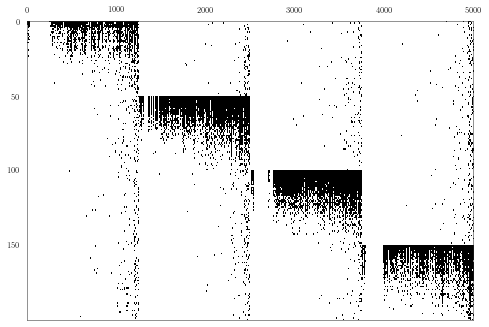

In [18]:
plt.spy(Mcp_raw, aspect='auto')
plt.show()

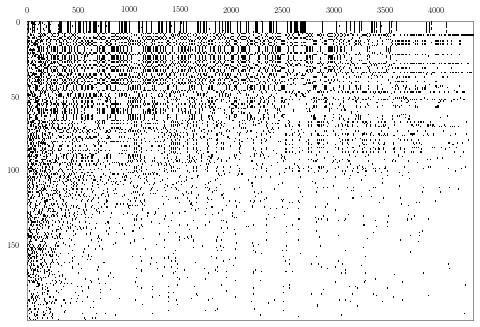

In [19]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp)
plt.spy(nmat, aspect='auto')
plt.show()

# Calculating complexities

In [20]:
ecis = EComm_0001_complexities.ECIcalculate(Mcp)
fitness = EComm_0001_complexities.FITNESScalculate(Mcp, numiter=1000)
realcomplexities = Cca_df_wide.sum(axis=1)
diversities = Mcp_df.sum(axis=1)

In [21]:
cty_array = np.array([[realcomplexities[c], diversities[c], ecis[c], fitness[c]] for c in range(Mcp_df.shape[0])])
cty_df = pd.DataFrame(cty_array, index=Mcp_df.index, columns=['RealComplexity', 'Diversity', 'ECI', 'Fitness'])
cty_df['country_code'] = Mcp_df.index.values 
cty_df['log_cap'] = np.log10(cty_df.RealComplexity.values) 
cty_df['log_div'] = np.log10(cty_df.Diversity.values) 
cty_df['Community'] = [cname[1] for cname in Mcp_df.index.values]

In [22]:
cty_df.index.name = 'country_code'

In [23]:
cty_df.head()

,RealComplexity,Diversity,ECI,Fitness,country_code,log_cap,log_div,Community
country_code,,,,,,,,
cA001,717.0,1128.0,-0.013328,96.790503,cA001,2.855519,3.052309,A
cA002,521.0,1013.0,-0.026160,8.226095,cA002,2.716838,3.005609,A
cA003,539.0,951.0,-0.035995,13.310144,cA003,2.731589,2.978181,A
cA004,471.0,817.0,-0.023253,3.996286,cA004,2.673021,2.912222,A
cA005,466.0,745.0,-0.008145,2.797845,cA005,2.668386,2.872156,A


### Into long format

In [24]:
cty_longdf = pd.melt(cty_df, id_vars=['country_code', 'Community'], value_vars=['RealComplexity', 'Diversity', 'ECI', 'Fitness'])

In [25]:
cty_longdf

,country_code,Community,variable,value
0,cA001,A,RealComplexity,717.000000
1,cA002,A,RealComplexity,521.000000
2,cA003,A,RealComplexity,539.000000
3,cA004,A,RealComplexity,471.000000
4,cA005,A,RealComplexity,466.000000
5,cA006,A,RealComplexity,425.000000
6,cA007,A,RealComplexity,395.000000
7,cA008,A,RealComplexity,415.000000
8,cA009,A,RealComplexity,381.000000
9,cA010,A,RealComplexity,411.000000


# Visualizing the complexities

In [26]:
mycolors = sns.color_palette("Set1", n_colors=K, desat=.5)

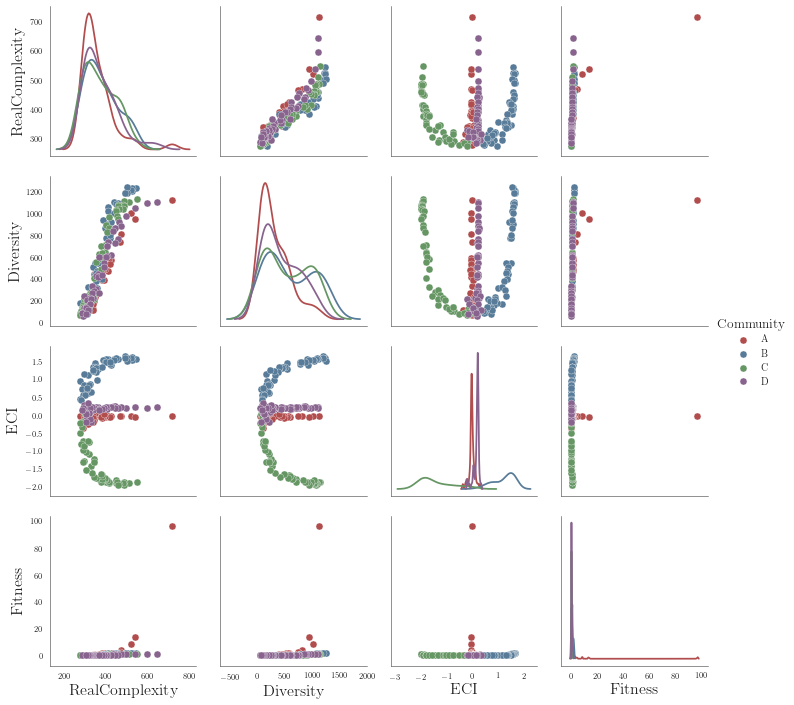

In [27]:
g = sns.pairplot(cty_df, vars=['RealComplexity', 'Diversity', 'ECI', 'Fitness'], 
                 hue="Community", 
                 palette=mycolors, 
                 diag_kind="kde", 
                 size=2.5)

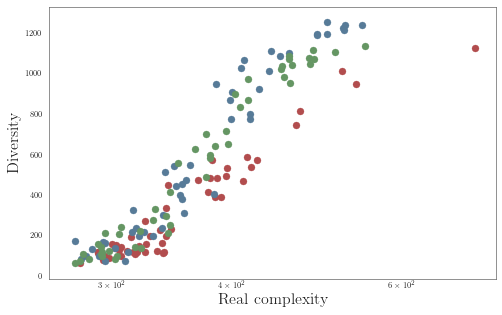

In [28]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.scatter(cty_df[cty_df.Community=="A"].RealComplexity, cty_df[cty_df.Community=="A"].Diversity, c=mycolors[0])
ax.scatter(cty_df[cty_df.Community=="B"].RealComplexity, cty_df[cty_df.Community=="B"].Diversity, c=mycolors[1])
ax.scatter(cty_df[cty_df.Community=="C"].RealComplexity, cty_df[cty_df.Community=="C"].Diversity, c=mycolors[2])
ax.set_xlabel('Real complexity', fontsize=16)
ax.set_ylabel('Diversity', fontsize=16)
ax.set_xscale('log')
#ax.set_yscale('log')

plt.show()

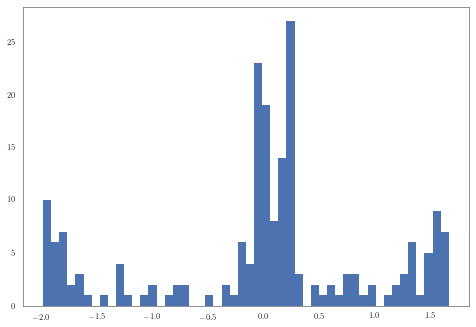

In [29]:
plt.hist(cty_df.ECI, bins=50)
plt.show()

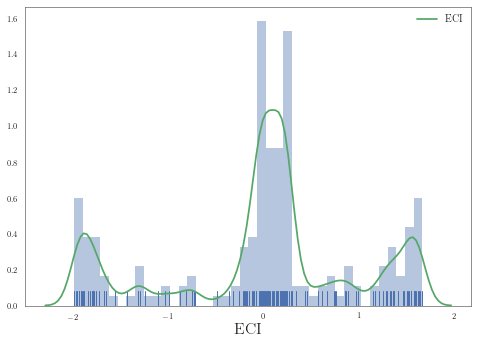

In [30]:
ax = sns.distplot(cty_df.ECI, bins=40, rug=True, kde=False, norm_hist=True)
sns.kdeplot(cty_df.ECI, bw=.1, ax=ax)
plt.show()

# -------------------------------------------------------------------------------------

### Principal Component Analysis on the Mcp

In [19]:
kcomm=1

In [20]:
Cca, Ppa = EComm_0001_complexities.create_toy_Cca_Ppa(240, 1440, K=kcomm)
Mcp_mat = EComm_0001_complexities.ProductionMatrix(np.array(Cca), np.array(Ppa).T, 1)

Mcp_df = pd.DataFrame(Mcp_mat, index=Cca.index.values, columns=Ppa.index.values)


# Getting rid of the rows/columns of pure zeros
Mcp_df = Mcp_df.loc[:, (Mcp_df != 0).any(axis=0)]
Mcp_df = Mcp_df.loc[(Mcp_df != 0).any(axis=1), :]
Mcp_mat = np.array(Mcp_df)


In [21]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, Vc, rightVc) = EComm_0001_complexities.ECeigenvecs(Mcp_df)
minsize = min(Mcp_df.shape)
print(minsize)



240


In [22]:
# left-eigenvalue data frame
Vc_df = pd.DataFrame(Vc, index=Mc2c.index)
Vc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

# right-eigenvalue data frame
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

print(Vc_df.head())
print(rightVc_df.head())

             0         1         2         3         4         5         6  \
cA001  0.06455 -0.058031 -0.052473  0.009362  0.000483  0.004945  0.015451   
cA002  0.06455 -0.056269 -0.044460  0.008155 -0.001146  0.005469  0.014504   
cA003  0.06455 -0.056222 -0.044574  0.007962 -0.001448  0.005787  0.013988   
cA004  0.06455 -0.055586 -0.042270  0.005082 -0.001480  0.003717  0.014627   
cA005  0.06455 -0.055725 -0.042019  0.008020  0.001043  0.005661  0.012016   

              7         8         9    ...           231       232       233  \
cA001 -0.004105 -0.000536 -0.003697    ...      0.001524 -0.004183  0.004442   
cA002 -0.005994 -0.000002 -0.002189    ...     -0.000223 -0.002510  0.001874   
cA003 -0.004859  0.000877 -0.001349    ...     -0.000636  0.000920  0.005747   
cA004 -0.004652 -0.000262 -0.003342    ...      0.017032  0.007156  0.004596   
cA005 -0.005757  0.000212 -0.002446    ...     -0.002532 -0.008347 -0.006098   

            234       235       236       237     

In [23]:
realcomms = np.unique(Vc_df['Community'].values)
kcomm = len(realcomms)
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

communities_vec = realcomms
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(array(['A'], dtype=object), 1, array([0]))

In [24]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(Mcp_df)

In [43]:
cty_marker_sizes = (Cca.sum(axis=1).values/(1.2*np.min(Cca.sum(axis=1).values)))**3.3
(np.min(cty_marker_sizes), np.max(cty_marker_sizes))

(0.54790074131890865, 199.71477611674842)

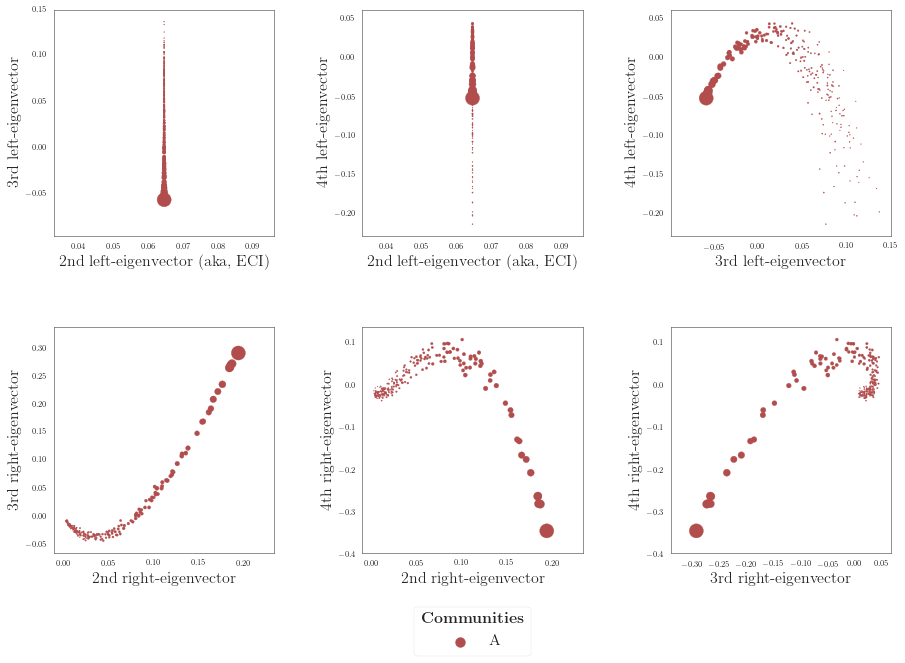

In [44]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
zzzz = 1
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(Vc_df[Vc_df.Community==target_name][1-zzzz], Vc_df[Vc_df.Community==target_name][2-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(Vc_df[Vc_df.Community==target_name][1-zzzz], Vc_df[Vc_df.Community==target_name][3-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(Vc_df[Vc_df.Community==target_name][2-zzzz], Vc_df[Vc_df.Community==target_name][3-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(rightVc_df[rightVc_df.Community==target_name][1-zzzz], -rightVc_df[rightVc_df.Community==target_name][2-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(rightVc_df[rightVc_df.Community==target_name][1-zzzz], rightVc_df[rightVc_df.Community==target_name][3-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=1)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(rightVc_df[rightVc_df.Community==target_name][2-zzzz], rightVc_df[rightVc_df.Community==target_name][3-zzzz],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()



### Principal Component Analysis on the Ccc

In [319]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(Mc2c)

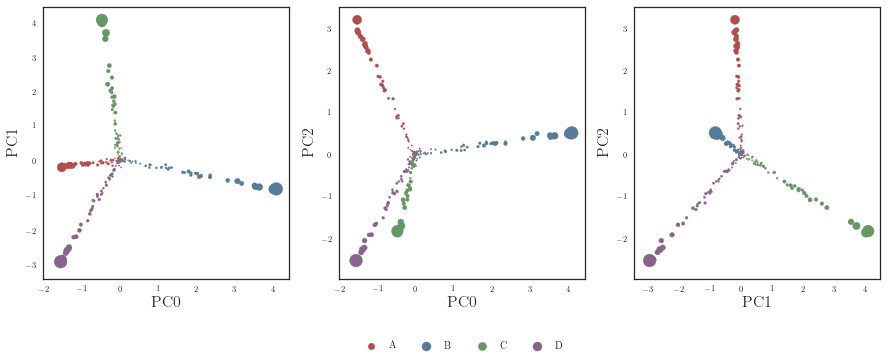

In [320]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[Vc_df.Community==target_name, 1], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()

# -------------------------------------------------------------------------------------

# EXPLORING THE RELATIONSHIP OF ECI WITH OTHER COMMUNITY DISCOVERY ALGORITHMS

In [224]:
kcomm = 4
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

In [225]:
Cca, Ppa = EComm_0001_complexities.create_toy_Cca_Ppa(240, 1440, K=kcomm)

In [226]:
(Cca.shape, Ppa.shape)

((240, 1784), (1440, 1784))

In [227]:
Mcp_1c = EComm_0001_complexities.ProductionMatrix(np.array(Cca), np.array(Ppa).T, 1)

In [228]:
Mcp_1c_df = pd.DataFrame(Mcp_1c, index=Cca.index.values, columns=Ppa.index.values)
Mcp_1c_df.head()

,pA0001,pA0002,pA0003,pA0004,pA0005,pA0006,pA0007,pA0008,pA0009,pA0010,...,pD0351,pD0352,pD0353,pD0354,pD0355,pD0356,pD0357,pD0358,pD0359,pD0360
cA001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cA002,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cA003,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
cA004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cA005,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [229]:
Mcp_1c_df.shape

(240, 1440)

In [230]:
Mcp_df_1c = Mcp_1c_df.loc[:, (Mcp_1c_df != 0).any(axis=0)]
Mcp_df_1c = Mcp_df_1c.loc[(Mcp_df_1c != 0).any(axis=1), :]
Mcp_mat = np.array(Mcp_df_1c)

In [231]:
Mcp_df_1c.shape

(240, 1270)

In [232]:
Mcp_df_1c.head()

,pA0001,pA0002,pA0003,pA0004,pA0005,pA0006,pA0007,pA0008,pA0009,pA0010,...,pD0351,pD0352,pD0353,pD0354,pD0355,pD0356,pD0357,pD0358,pD0359,pD0360
cA001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cA002,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cA003,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
cA004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cA005,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


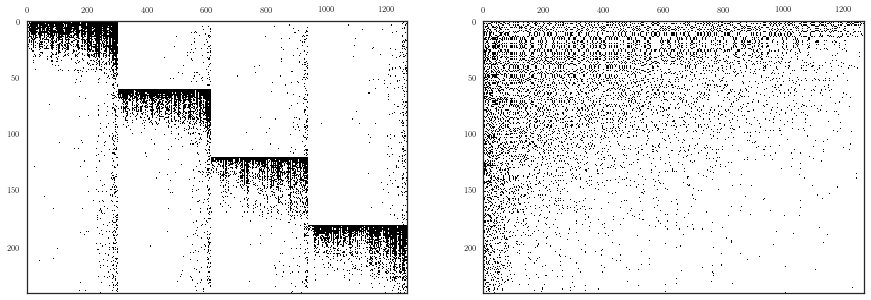

In [349]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp_mat)

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.spy(Mcp_mat, aspect='auto')

ax2 = fig.add_subplot(122)
ax2.spy(nmat, aspect='auto')


plt.show()

In [265]:
realcomplexities = Cca.sum(axis=1)
divty = Mcp_df_1c.sum(axis=1)
ubity = Mcp_df_1c.sum(axis=0)

In [235]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, Vc), (Mp2p, Dp, Vp) = EComm_0001_complexities.ECeigenvecs(Mcp_df_1c)
minsize = min(Mcp_df_1c.shape)
print(minsize)

240


In [236]:
#(Dc[:minsize], Dp[:minsize])

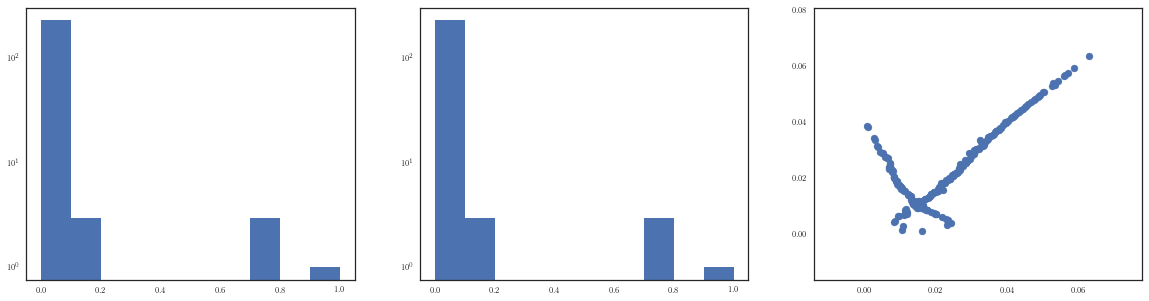

In [237]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax1.hist(Dc[:minsize])
#ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(1,3,2)
ax2.hist(Dp[:minsize])
#ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(Dc[10:minsize], Dp[10:minsize])
#ax3.set_xscale('log')
#ax3.set_yscale('log')

plt.show()

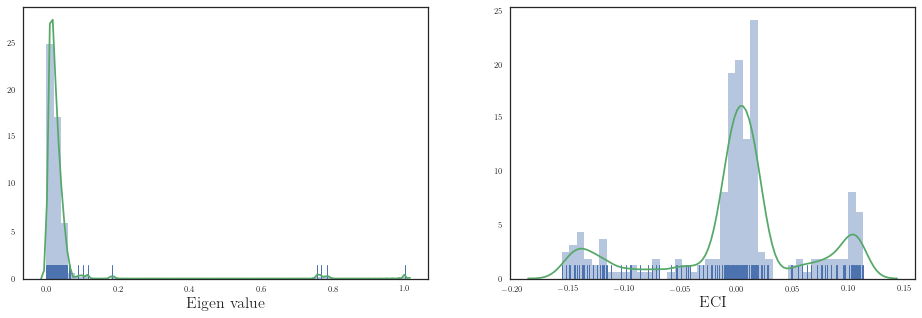

In [238]:
fig = plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
sns.distplot(Dc, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigen value")
sns.kdeplot(Dc, bw=.005, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(Vc[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="ECI")
sns.kdeplot(Vc[:,1], bw=.01, ax=ax2)
plt.show()

In [239]:
np.sum(Dc)

9.189966795336332

In [240]:
np.sum(Dc>0.3)

4

In [241]:
np.sum(Dc[Dc>0.3])/np.sum(Dc)

0.35978827475983133

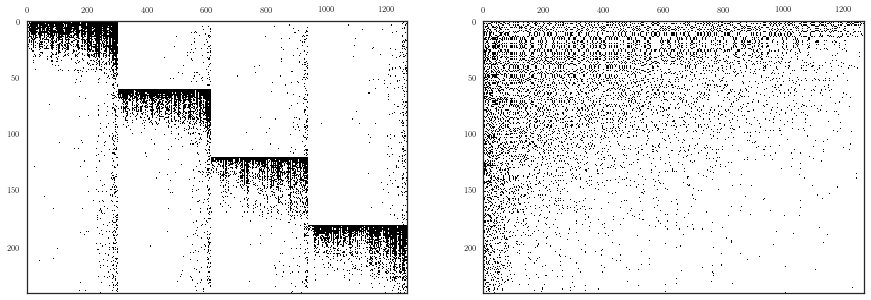

In [349]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp_mat)

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.spy(Mcp_mat, aspect='auto')

ax2 = fig.add_subplot(122)
ax2.spy(nmat, aspect='auto')


plt.show()

### Newman modularity-type community discovery

In [248]:
Vc_df = pd.DataFrame(Vc, index=Mc2c.index)
Vc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

In [249]:
Vc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Community
cA001,-0.06455,0.107116,-0.099928,-0.009327,0.031405,0.008326,0.022613,-0.098291,-0.039877,0.009822,...,-0.003828,0.005668,-0.026618,0.015864,-0.020072,-0.006476,0.000928,-0.000685,-0.000391,A
cA002,-0.06455,0.113259,-0.100830,-0.008490,0.032506,0.007042,0.024512,-0.079058,-0.029966,0.011128,...,-0.005775,0.003700,0.003560,-0.000827,-0.015126,-0.012521,0.005629,-0.001519,0.011934,A
cA003,-0.06455,0.111770,-0.098672,-0.009807,0.030123,0.003422,0.026790,-0.081605,-0.028686,0.010385,...,0.007378,-0.006341,-0.003584,-0.030826,-0.017248,0.002520,0.007854,0.001446,-0.014088,A
cA004,-0.06455,0.109082,-0.096087,-0.010293,0.028952,0.005103,0.018541,-0.077630,-0.026510,-0.001162,...,0.025380,0.006697,-0.023590,-0.015706,-0.010413,0.006267,0.020553,0.005038,0.039002,A
cA005,-0.06455,0.106411,-0.094494,-0.008139,0.028152,0.006360,0.023148,-0.074873,-0.030424,0.007620,...,0.001303,-0.002524,0.009431,-0.009669,-0.001043,0.012665,0.002712,0.008493,0.017897,A


### ECI plus the 3rd left-eigenvector

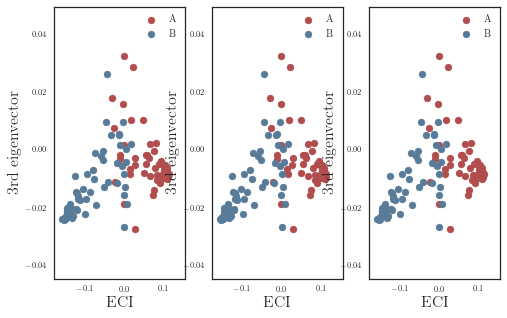

In [250]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(1,3,1)

ax1.scatter(Vc_df[Vc_df.Community=="A"][1], Vc_df[Vc_df.Community=="A"][3], c=mycolors[0], label="A")
ax1.scatter(Vc_df[Vc_df.Community=="B"][1], Vc_df[Vc_df.Community=="B"][3], c=mycolors[1], label="B")
ax.scatter(Vc_df[Vc_df.Community=="C"][1], Vc_df[Vc_df.Community=="C"][2], c=mycolors[2], label="C")
ax1.set_xlabel('ECI', fontsize=16)
ax1.set_ylabel('3rd eigenvector', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)

ax2.scatter(Vc_df[Vc_df.Community=="A"][1], Vc_df[Vc_df.Community=="A"][3], c=mycolors[0], label="A")
ax2.scatter(Vc_df[Vc_df.Community=="B"][1], Vc_df[Vc_df.Community=="B"][3], c=mycolors[1], label="B")
#ax.scatter(Vc_df[Vc_df.Community=="C"][1], Vc_df[Vc_df.Community=="C"][2], c=mycolors[2], label="C")
ax2.set_xlabel('ECI', fontsize=16)
ax2.set_ylabel('3rd eigenvector', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

ax3 = fig.add_subplot(1,3,3)

ax3.scatter(Vc_df[Vc_df.Community=="A"][1], Vc_df[Vc_df.Community=="A"][3], c=mycolors[0], label="A")
ax3.scatter(Vc_df[Vc_df.Community=="B"][1], Vc_df[Vc_df.Community=="B"][3], c=mycolors[1], label="B")
#ax.scatter(Vc_df[Vc_df.Community=="C"][1], Vc_df[Vc_df.Community=="C"][2], c=mycolors[2], label="C")
ax3.set_xlabel('ECI', fontsize=16)
ax3.set_ylabel('3rd eigenvector', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

In [254]:
communities_vec = ['A', 'B', 'C', 'D']
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)
(communities_vec, numcommunities, rncomm)


(['A', 'B', 'C', 'D'], 4, array([0, 1, 2, 3]))

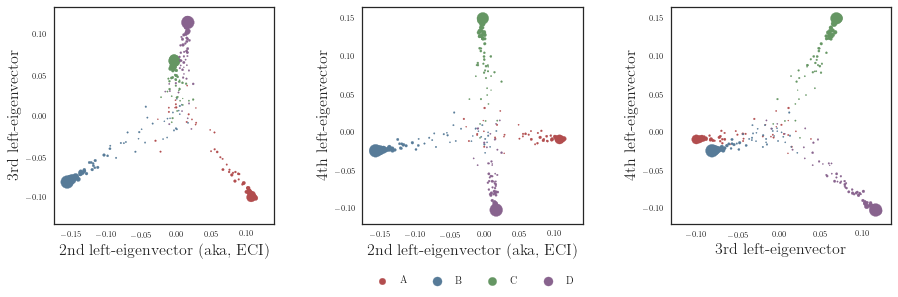

In [316]:
fig = plt.figure(figsize=(15,4))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(Vc_df[Vc_df.Community==target_name][1], Vc_df[Vc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(Vc_df[Vc_df.Community==target_name][1], Vc_df[Vc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(Vc_df[Vc_df.Community==target_name][2], Vc_df[Vc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))


plt.subplots_adjust(wspace=0.4, hspace=0.1)

#plt.axis([-2, 3, -3, 3])
plt.show()

### Calculating the right-eigenvectors instead

In [322]:
rightDc, rightVc = np.linalg.eig(Mc2c)


In [323]:
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

In [324]:
rightVc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Community
cA001,-0.143388,0.173083,-0.164174,-0.016773,0.118131,0.020327,-0.058310,-0.271953,-0.158621,-0.056872,...,0.022005,-0.024113,0.023311,-0.060400,-0.125920,0.091679,0.004104,0.002742,0.001573,A
cA002,-0.128647,0.164196,-0.148625,-0.013698,0.109703,0.015424,-0.056709,-0.196252,-0.106943,-0.057806,...,-0.023015,-0.041830,0.013651,0.002824,0.015111,0.061985,0.022338,0.005452,-0.043037,A
cA003,-0.130881,0.164850,-0.147969,-0.016098,0.103427,0.007626,-0.063055,-0.206091,-0.104153,-0.054886,...,-0.108173,0.008565,-0.023801,0.107127,-0.015476,0.071911,0.031709,-0.005279,0.051684,A
cA004,-0.131774,0.161985,-0.145078,-0.017011,0.100083,0.011449,-0.043937,-0.197391,-0.096907,0.006181,...,-0.060917,0.021447,0.025312,0.054954,-0.102556,0.043709,0.083543,-0.018525,-0.144065,A
cA005,-0.130434,0.156411,-0.141221,-0.013315,0.096327,0.014124,-0.054296,-0.188444,-0.110086,-0.040134,...,-0.084554,0.042899,-0.009441,0.033488,0.040583,0.004333,0.010912,-0.030911,-0.065435,A


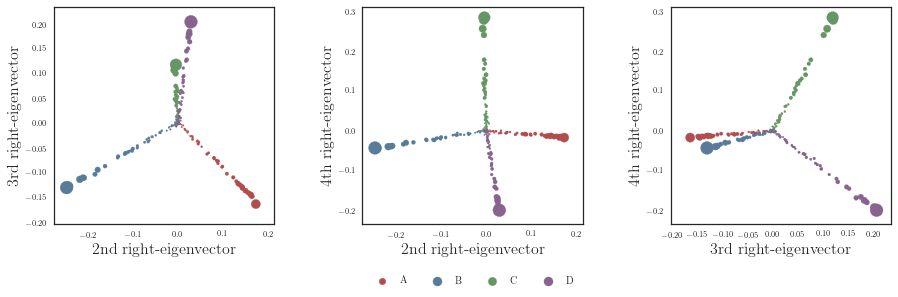

In [327]:
fig = plt.figure(figsize=(15,4))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(rightVc_df[rightVc_df.Community==target_name][1], rightVc_df[rightVc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax1.set_xlabel('2nd right-eigenvector', fontsize=16)
ax1.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(rightVc_df[rightVc_df.Community==target_name][1], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax2.set_xlabel('2nd right-eigenvector', fontsize=16)
ax2.set_ylabel('4th right-eigenvector', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(rightVc_df[rightVc_df.Community==target_name][2], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax3.set_xlabel('3rd right-eigenvector', fontsize=16)
ax3.set_ylabel('4th right-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))


plt.subplots_adjust(wspace=0.4, hspace=0.1)

#plt.axis([-2, 3, -3, 3])
plt.show()

# Understanding the diagonalization of Mc2c

In [330]:
Vc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Community
cA001,-0.06455,0.107116,-0.099928,-0.009327,0.031405,0.008326,0.022613,-0.098291,-0.039877,0.009822,...,-0.003828,0.005668,-0.026618,0.015864,-0.020072,-0.006476,0.000928,-0.000685,-0.000391,A
cA002,-0.06455,0.113259,-0.100830,-0.008490,0.032506,0.007042,0.024512,-0.079058,-0.029966,0.011128,...,-0.005775,0.003700,0.003560,-0.000827,-0.015126,-0.012521,0.005629,-0.001519,0.011934,A
cA003,-0.06455,0.111770,-0.098672,-0.009807,0.030123,0.003422,0.026790,-0.081605,-0.028686,0.010385,...,0.007378,-0.006341,-0.003584,-0.030826,-0.017248,0.002520,0.007854,0.001446,-0.014088,A
cA004,-0.06455,0.109082,-0.096087,-0.010293,0.028952,0.005103,0.018541,-0.077630,-0.026510,-0.001162,...,0.025380,0.006697,-0.023590,-0.015706,-0.010413,0.006267,0.020553,0.005038,0.039002,A
cA005,-0.06455,0.106411,-0.094494,-0.008139,0.028152,0.006360,0.023148,-0.074873,-0.030424,0.007620,...,0.001303,-0.002524,0.009431,-0.009669,-0.001043,0.012665,0.002712,0.008493,0.017897,A


In [329]:
rightVc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Community
cA001,-0.143388,0.173083,-0.164174,-0.016773,0.118131,0.020327,-0.058310,-0.271953,-0.158621,-0.056872,...,0.022005,-0.024113,0.023311,-0.060400,-0.125920,0.091679,0.004104,0.002742,0.001573,A
cA002,-0.128647,0.164196,-0.148625,-0.013698,0.109703,0.015424,-0.056709,-0.196252,-0.106943,-0.057806,...,-0.023015,-0.041830,0.013651,0.002824,0.015111,0.061985,0.022338,0.005452,-0.043037,A
cA003,-0.130881,0.164850,-0.147969,-0.016098,0.103427,0.007626,-0.063055,-0.206091,-0.104153,-0.054886,...,-0.108173,0.008565,-0.023801,0.107127,-0.015476,0.071911,0.031709,-0.005279,0.051684,A
cA004,-0.131774,0.161985,-0.145078,-0.017011,0.100083,0.011449,-0.043937,-0.197391,-0.096907,0.006181,...,-0.060917,0.021447,0.025312,0.054954,-0.102556,0.043709,0.083543,-0.018525,-0.144065,A
cA005,-0.130434,0.156411,-0.141221,-0.013315,0.096327,0.014124,-0.054296,-0.188444,-0.110086,-0.040134,...,-0.084554,0.042899,-0.009441,0.033488,0.040583,0.004333,0.010912,-0.030911,-0.065435,A


In [345]:
# The diagonalization of C:
# C = P.D.P^-1
# where the D is the diagonal matrix of eigenvalues
# and the columns of P are the right eigenvectos of C
# the rows of P^-1 are the left eigenvectors of C
Mc2c.iloc[:5,:5]

,cA001,cA002,cA003,cA004,cA005
cA001,0.055652,0.049047,0.048207,0.047959,0.044571
cA002,0.044005,0.049555,0.043057,0.041494,0.042442
cA003,0.044002,0.043805,0.048978,0.043402,0.041956
cA004,0.044074,0.042502,0.043698,0.049492,0.041582
cA005,0.040544,0.043032,0.041813,0.041159,0.046939


In [348]:
np.dot(rightVc, np.dot(np.diag(Dc), Vc.T))[:5, :5]

array([[ 0.04165644,  0.04067188,  0.04051342,  0.03811512,  0.03836551],
       [ 0.03635697,  0.03840258,  0.03541116,  0.03519516,  0.03442032],
       [ 0.03690055,  0.03617099,  0.03470971,  0.03719508,  0.03542721],
       [ 0.03514083,  0.03608121,  0.03734044,  0.03641469,  0.03423698],
       [ 0.03471108,  0.03474934,  0.03502621,  0.03392236,  0.03549334]])

In [334]:
np.around(Vc.T.dot(rightVc), 5)

array([[ 0.78206,  0.     , -0.     , ..., -0.     , -0.     ,  0.     ],
       [-0.     ,  0.90323, -0.     , ..., -0.     ,  0.     , -0.     ],
       [ 0.     ,  0.     ,  0.88936, ...,  0.     , -0.     , -0.     ],
       ..., 
       [ 0.     ,  0.     , -0.     , ...,  0.72018,  0.     ,  0.     ],
       [-0.     , -0.     , -0.     , ..., -0.     , -0.74043, -0.     ],
       [ 0.     ,  0.     ,  0.     , ..., -0.     , -0.     , -0.70933]])

In [343]:
Vc_df[2].dot(Vc_df[4])

-0.11167113632859521

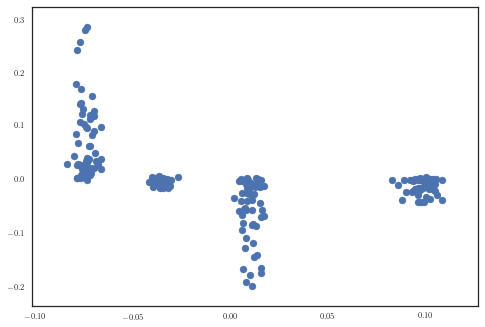

In [414]:
coli = 3
plt.scatter(Vc_df[coli], rightVc_df[coli])
plt.show()

### Principal Component Analysis on the Mcp

In [317]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(Mcp_df_1c)

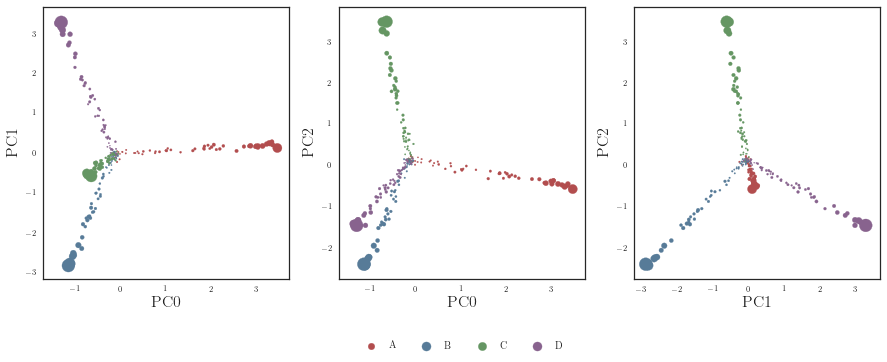

In [318]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[Vc_df.Community==target_name, 1], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()

### Principal Component Analysis on the Ccc

In [319]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(Mc2c)

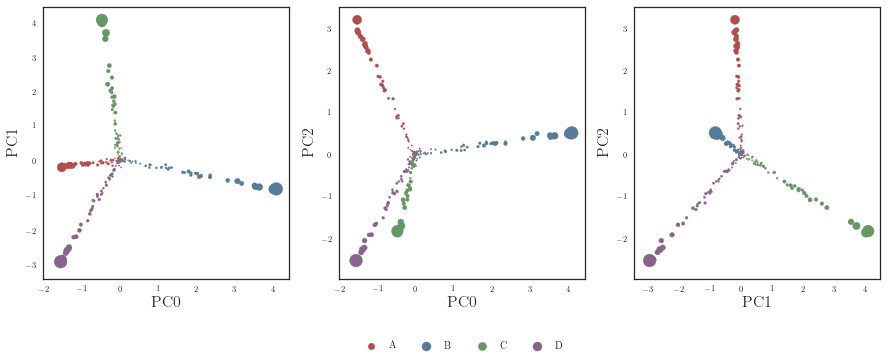

In [320]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[Vc_df.Community==target_name, 1], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()

### Checking how diversity is correlated with the first principal component and ECI

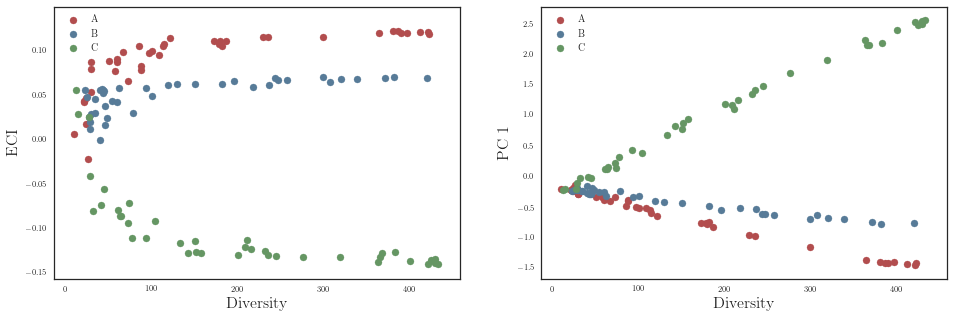

In [31]:
fig = plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=0.2)


ax1 = fig.add_subplot(1,2,1)
# versus ECI
ax1.scatter(divty[Vc_df.Community=="A"], Vc_df[Vc_df.Community=="A"][1], c=mycolors[0], label="A")
ax1.scatter(divty[Vc_df.Community=="B"], Vc_df[Vc_df.Community=="B"][1], c=mycolors[1], label="B")
ax1.scatter(divty[Vc_df.Community=="C"], Vc_df[Vc_df.Community=="C"][1], c=mycolors[2], label="C")
ax1.set_xlabel('Diversity', fontsize=16)
ax1.set_ylabel('ECI', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,2,2)
# versus PC 1
ax2.scatter(divty[Vc_df.Community=="A"], X_pca[Vc_df.Community=="A", 0], c=mycolors[0], label="A")
ax2.scatter(divty[Vc_df.Community=="B"], X_pca[Vc_df.Community=="B", 0], c=mycolors[1], label="B")
ax2.scatter(divty[Vc_df.Community=="C"], X_pca[Vc_df.Community=="C", 0], c=mycolors[2], label="C")
ax2.set_xlabel('Diversity', fontsize=16)
ax2.set_ylabel('PC 1', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

### does PC1 correlate with the true number of capabilities?

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=0.2)


ax1 = fig.add_subplot(1,1,1)
# versus ECI
ax1.scatter(X_pca[Vc_df.Community=="A", 0], Cca.sum(axis=1)[Vc_df.Community=="A"], c=mycolors[0], label="A")
ax1.scatter(X_pca[Vc_df.Community=="B", 0], Cca.sum(axis=1)[Vc_df.Community=="B"], c=mycolors[1], label="B")
ax1.scatter(X_pca[Vc_df.Community=="C", 0], Cca.sum(axis=1)[Vc_df.Community=="C"], c=mycolors[2], label="C")
ax1.set_xlabel('PC 1', fontsize=16)
ax1.set_ylabel('Real complexity', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

### does diversity correlate with the true number of capabilities?

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.subplots_adjust(wspace=0.2)


ax1 = fig.add_subplot(1,1,1)
# versus ECI
ax1.scatter(divty[Vc_df.Community=="A"], Cca.sum(axis=1)[Vc_df.Community=="A"], c=mycolors[0], label="A")
ax1.scatter(divty[Vc_df.Community=="B"], Cca.sum(axis=1)[Vc_df.Community=="B"], c=mycolors[1], label="B")
ax1.scatter(divty[Vc_df.Community=="C"], Cca.sum(axis=1)[Vc_df.Community=="C"], c=mycolors[2], label="C")
ax1.set_xlabel('Diversity', fontsize=16)
ax1.set_ylabel('Real complexity', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

### ECI versus PC 1 and PC 2

In [ ]:
fig = plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# with PC 1
ax1.scatter(Vc_df[Vc_df.Community=="A"][1], X_pca[Vc_df.Community=="A", 0], c=mycolors[0], label="A")
ax1.scatter(Vc_df[Vc_df.Community=="B"][1], X_pca[Vc_df.Community=="B", 0], c=mycolors[1], label="B")
ax1.scatter(Vc_df[Vc_df.Community=="C"][1], X_pca[Vc_df.Community=="C", 0], c=mycolors[2], label="C")
ax1.set_xlabel('ECI', fontsize=16)
ax1.set_ylabel('PC 1', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)


ax2 = fig.add_subplot(1,2,2)
# with PC 2
ax2.scatter(Vc_df[Vc_df.Community=="A"][1], X_pca[Vc_df.Community=="A", 1], c=mycolors[0], label="A")
ax2.scatter(Vc_df[Vc_df.Community=="B"][1], X_pca[Vc_df.Community=="B", 1], c=mycolors[1], label="B")
ax2.scatter(Vc_df[Vc_df.Community=="C"][1], X_pca[Vc_df.Community=="C", 1], c=mycolors[2], label="C")
ax2.set_xlabel('ECI', fontsize=16)
ax2.set_ylabel('PC 2', fontsize=16)
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

In [ ]:
pca = PCA(n_components = 3, whiten = True)
X_pca = pca.fit_transform(Mc2c.T)

In [ ]:
plt.figure(figsize=(8, 8))
for color, i, target_name in zip(mycolors, [0, 1, 2], np.array(['A', 'B', 'C'])):
    print([color, i, target_name])
    plt.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 1],
                color=color, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

In [ ]:
Bdf = Mc2c + Mc2c.T
Bdf.head()

In [ ]:
lambdas_c, eigenvecs_c = linalg.eig(Bdf)

In [ ]:
fig = plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
sns.distplot(lambdas_c, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigen value")
sns.kdeplot(lambdas_c, bw=.005, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(eigenvecs_c[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="Eigen vec 1")
sns.kdeplot(eigenvecs_c[:,1], bw=.01, ax=ax2)
plt.show()

In [ ]:
lambdas_c, eigenvecs_c = linalg.eig(Mc2c)

In [ ]:
plt.scatter(divty, -eigenvecs_c[:,0])
plt.show()

# Distance to center

In [7]:
kcomm=6

In [20]:
Cca, Ppa = EComm_0001_complexities.create_toy_Cca_Ppa(240, 1440, K=kcomm)
Mcp_mat = EComm_0001_complexities.ProductionMatrix(np.array(Cca), np.array(Ppa).T, 1)

Mcp_df = pd.DataFrame(Mcp_mat, index=Cca.index.values, columns=Ppa.index.values)


# Getting rid of the rows/columns of pure zeros
Mcp_df = Mcp_df.loc[:, (Mcp_df != 0).any(axis=0)]
Mcp_df = Mcp_df.loc[(Mcp_df != 0).any(axis=1), :]
Mcp_mat = np.array(Mcp_df)


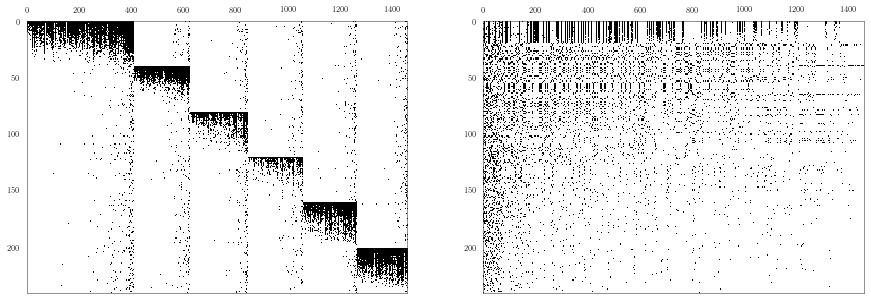

In [21]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(Mcp_mat)

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.spy(Mcp_mat, aspect='auto')

ax2 = fig.add_subplot(122)
ax2.spy(nmat, aspect='auto')


plt.show()

In [22]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, Vc), (Mp2p, Dp, Vp) = EComm_0001_complexities.ECeigenvecs(Mcp_df)
minsize = min(Mcp_df.shape)
print(minsize)

# Calculating the right-eigenvectors
rightDc, rightVc = np.linalg.eig(Mc2c)

240


In [23]:
# left-eigenvalue data frame
Vc_df = pd.DataFrame(Vc, index=Mc2c.index)
Vc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

# right-eigenvalue data frame
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]


In [24]:
realcomms = np.unique(Vc_df['Community'].values)
kcomm = len(realcomms)
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

communities_vec = realcomms
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 6,
 array([0, 1, 2, 3, 4, 5]))

In [25]:
realc = Cca.sum(axis=1)
print(np.min(realc.values), np.max(realc.values))
dists = EComm_0001_complexities.distance_to_center(Mcp_df)
print(np.min(dists.values), np.max(dists.values))
print(Dc[:10])

440.0 1070.0
The number of clusters is: 6
0.0667716077025 5.01005809914
[ 1.          0.78648945  0.75782427  0.73636569  0.70801039  0.64563456
  0.17465964  0.1118667   0.10244369  0.08689392]


In [26]:
asdf = 1.0/Dc
asdf[:10]


array([  1.        ,   1.27147287,   1.31956713,   1.35802091,
         1.41240865,   1.5488638 ,   5.7254213 ,   8.93921091,
         9.76145983,  11.50828498])

In [27]:
asdf = np.arange(1,Mcp_df.shape[0]+1)*Dc

In [28]:
asdf[:10]

array([ 1.        ,  1.57297891,  2.27347282,  2.94546275,  3.54005195,
        3.87380736,  1.22261745,  0.89493358,  0.92199324,  0.8689392 ])

In [29]:
realc.head()

country_code
cA001    792.0
cA002    715.0
cA003    668.0
cA004    672.0
cA005    658.0
dtype: float64

In [30]:
dists.head()

,0
cA001,3.078288
cA002,3.021802
cA003,2.954317
cA004,2.832088
cA005,2.768343


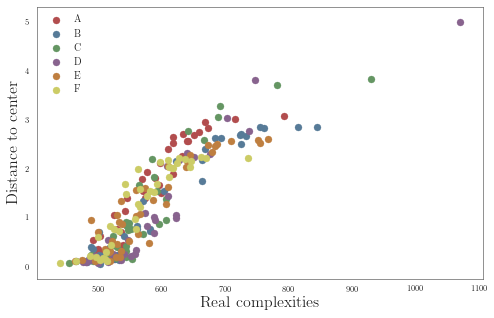

In [31]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax.scatter(realc[Vc_df.Community==target_name].values, dists[Vc_df.Community==target_name].values,
                c=color, label=target_name)
ax.set_xlabel('Real complexities', fontsize=16)
ax.set_ylabel('Distance to center', fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

plt.show()

In [32]:
invdist = np.log(1.1*np.max(dists.values)/(1.1*np.max(dists.values)-dists.values))
invdist = pd.DataFrame(invdist, index=Mc2c.index)

In [33]:
invdist

,0
cA001,0.817725
cA002,0.794771
cA003,0.768022
cA004,0.721323
cA005,0.697807
cA006,0.668905
cA007,0.677270
cA008,0.656195
cA009,0.614469
cA010,0.628039


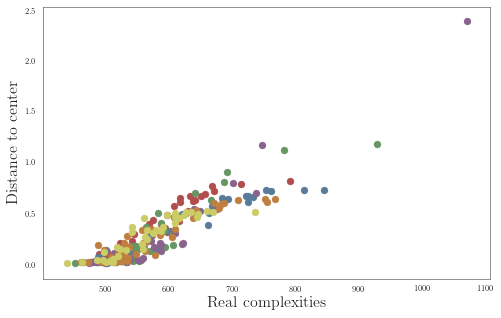

In [34]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax.scatter(realc[Vc_df.Community==target_name].values, invdist[Vc_df.Community==target_name].values,
                c=color, label=target_name)
ax.set_xlabel('Real complexities', fontsize=16)
ax.set_ylabel('Distance to center', fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.show()

In [35]:
ecis = EComm_0001_complexities.ECIcalculate(Mcp_df)
fitness = EComm_0001_complexities.FITNESScalculate(Mcp_df, numiter=1000)
realcomplexities = Cca.sum(axis=1)
diversities = Mcp_df.sum(axis=1)

In [36]:
cty_array = np.array([[realcomplexities[c], diversities[c], ecis[c], fitness[c]] for c in range(Mcp_df.shape[0])])
cty_df = pd.DataFrame(cty_array, index=Mcp_df.index, columns=['RealComplexity', 'Diversity', 'ECI', 'Fitness'])
cty_df['country_code'] = Mcp_df.index.values 
cty_df['log_cap'] = np.log10(cty_df.RealComplexity.values) 
cty_df['log_div'] = np.log10(cty_df.Diversity.values) 
cty_df['Community'] = [cname[1] for cname in Mcp_df.index.values]
cty_df['Dist2Center'] = invdist.values
for k in range(kcomm):
    cty_df['eigen'+str(k)] = rightVc[:,k]

In [37]:
cty_df.index.name = 'country_code'

In [38]:
cty_df.head()

,RealComplexity,Diversity,ECI,Fitness,country_code,log_cap,log_div,Community,Dist2Center,eigen0,eigen1,eigen2,eigen3,eigen4,eigen5
country_code,,,,,,,,,,,,,,,
cA001,792.0,428.0,2.521927,4.381859e-126,cA001,2.898725,2.631444,A,0.817725,-0.176470,0.242477,-0.029785,-0.051294,0.024043,0.026931
cA002,715.0,419.0,2.535386,4.066104e-126,cA002,2.854306,2.622214,A,0.794771,-0.172759,0.238804,-0.030479,-0.048754,0.022964,0.024625
cA003,668.0,411.0,2.524758,3.599319e-126,cA003,2.824776,2.613842,A,0.768022,-0.169461,0.233140,-0.027506,-0.047115,0.024555,0.025081
cA004,672.0,399.0,2.481815,3.034998e-126,cA004,2.827369,2.600973,A,0.721323,-0.164513,0.222002,-0.028458,-0.048005,0.020245,0.018262
cA005,658.0,391.0,2.466109,2.936301e-126,cA005,2.818226,2.592177,A,0.697807,-0.161215,0.215999,-0.026803,-0.049274,0.022182,0.018795


In [39]:
eigenvarsnames = list(map(lambda x: 'eigen' + str(x), range(kcomm)))
eigenvarsnames

['eigen0', 'eigen1', 'eigen2', 'eigen3', 'eigen4', 'eigen5']

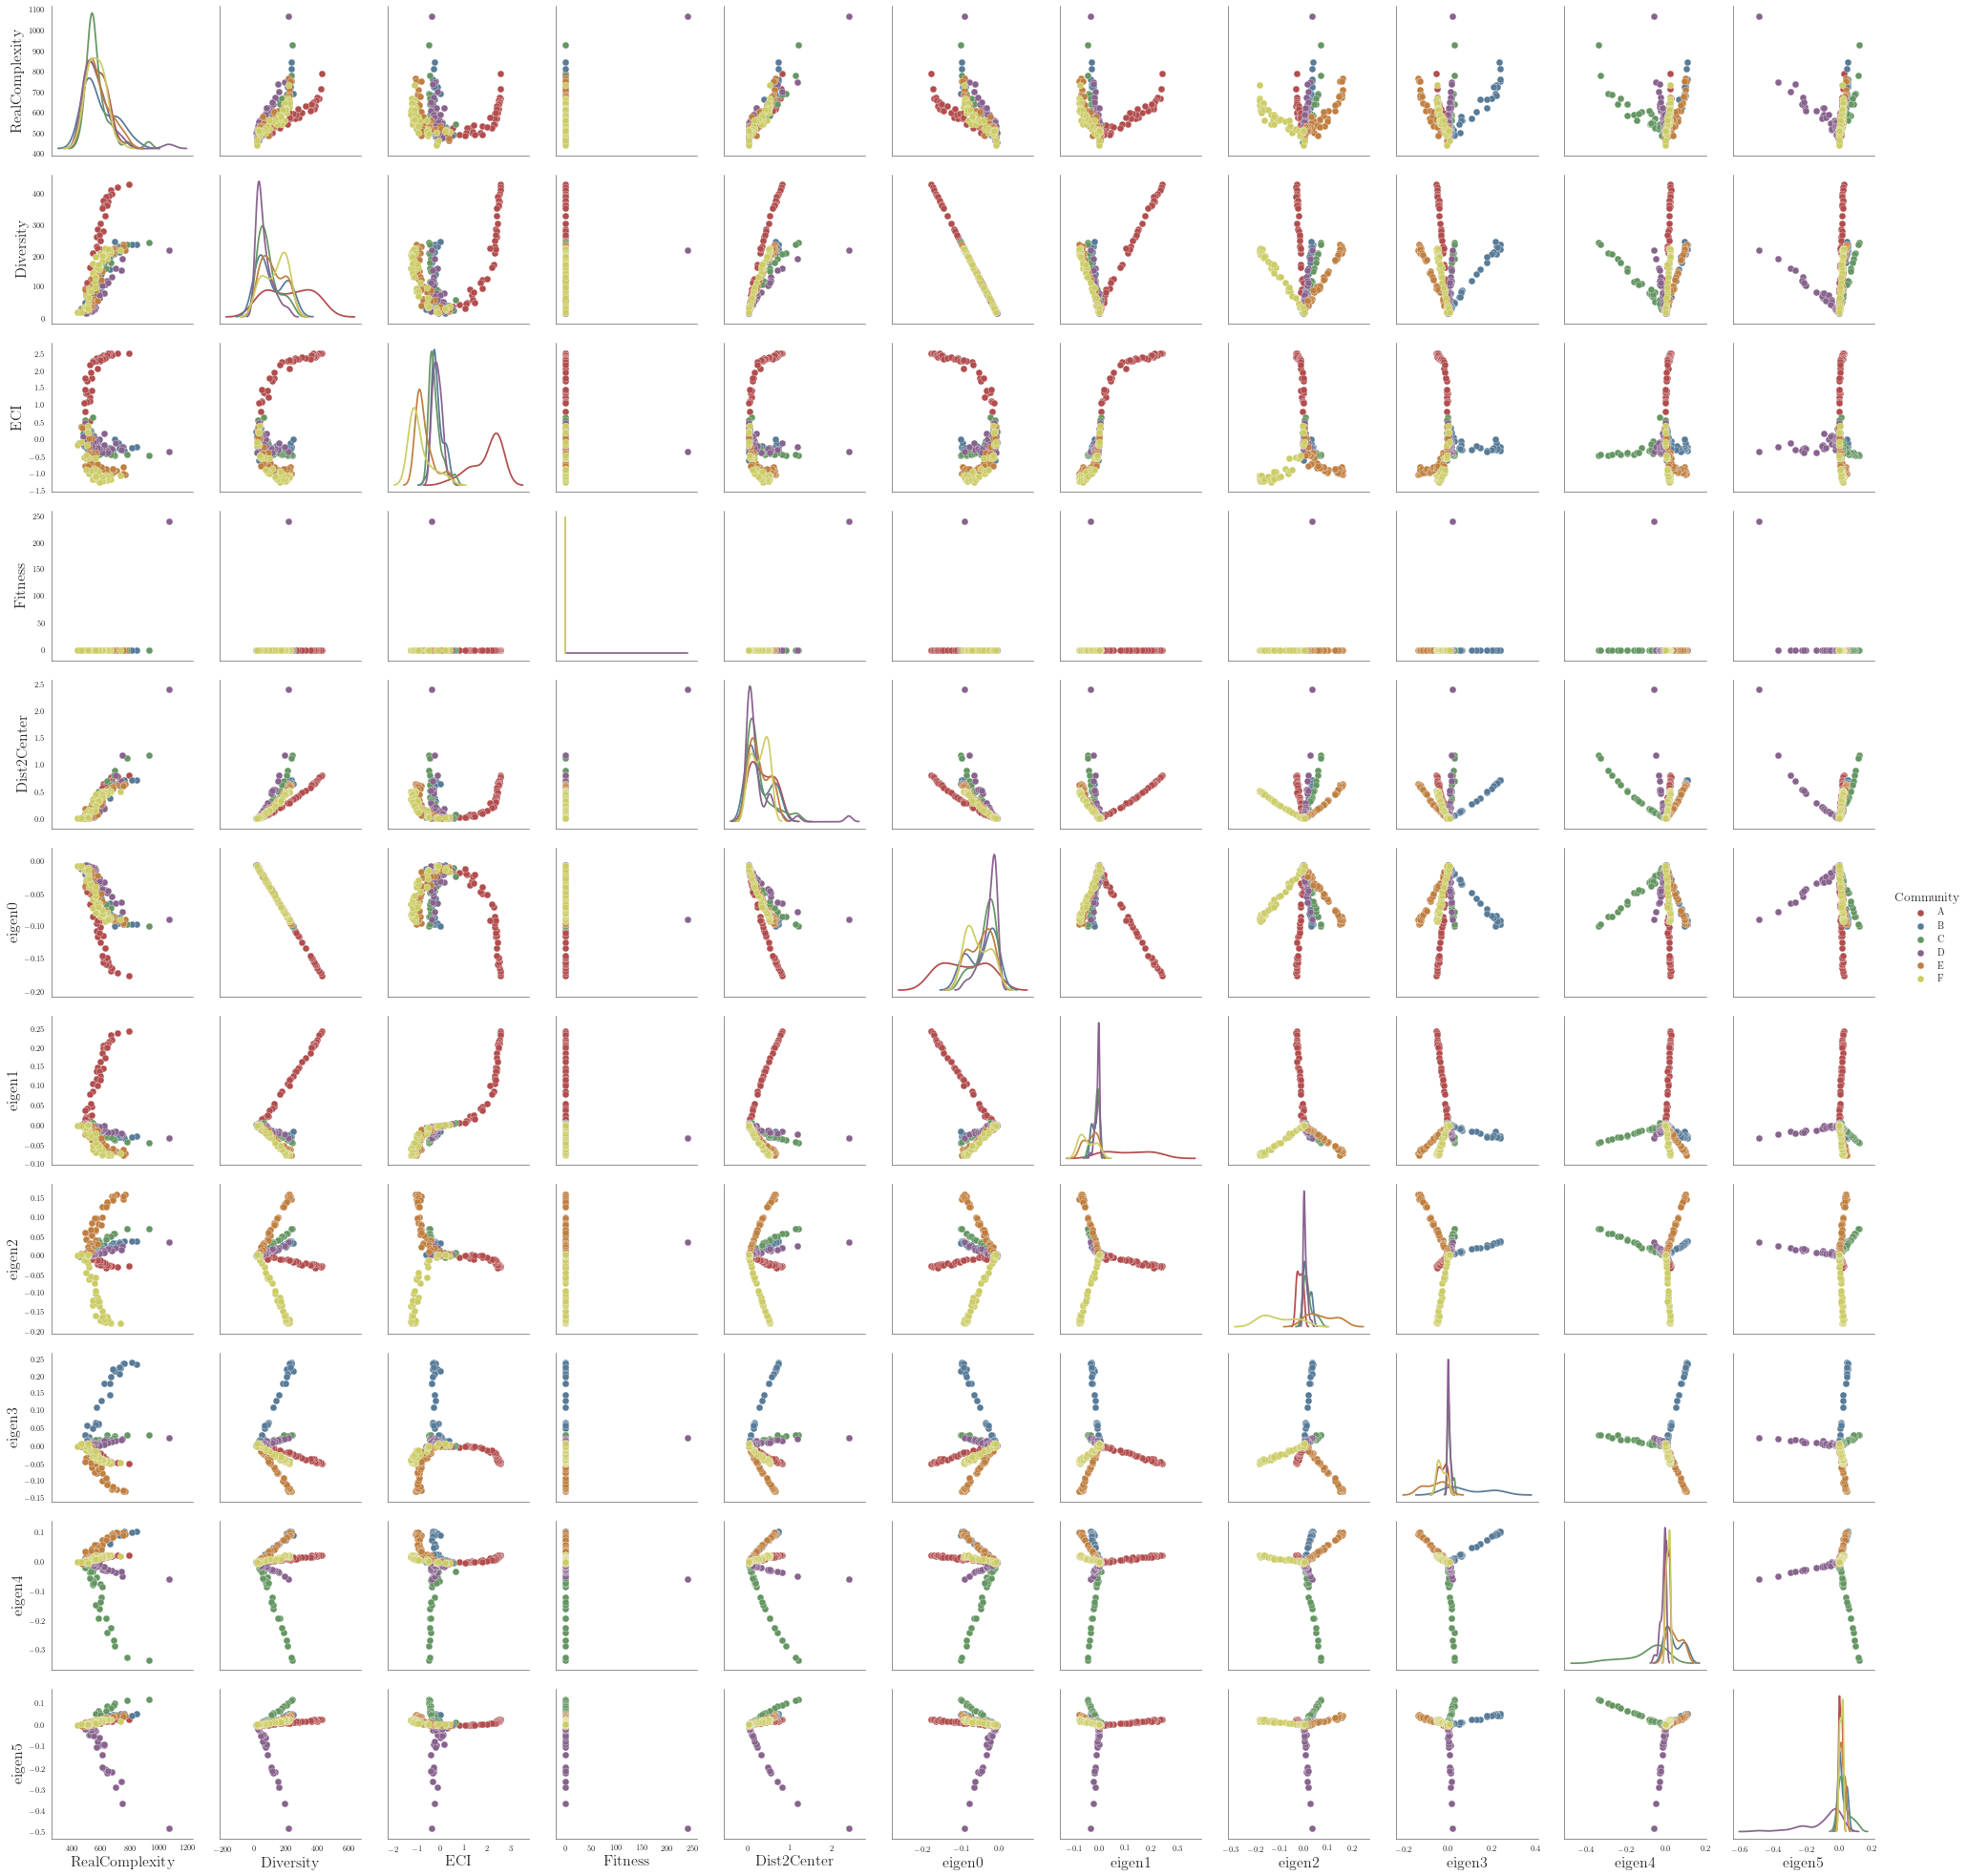

In [40]:
g = sns.pairplot(cty_df, vars=list(np.concatenate((['RealComplexity', 'Diversity', 'ECI', 'Fitness', 'Dist2Center'],
                              eigenvarsnames))), 
                 hue="Community", 
                 palette=mycolors, 
                 diag_kind="kde", 
                 size=2.5)

In [143]:
cty_df[['RealComplexity', 'eigen0', 'eigen1','eigen2','eigen3']].head()

,RealComplexity,eigen0,eigen1,eigen2,eigen3
country_code,,,,,
cA001,1080.0,-0.166102,0.133781,0.325351,0.053873
cA002,787.0,-0.150061,0.115480,0.288918,0.045219
cA003,805.0,-0.144369,0.113282,0.267401,0.039663
cA004,775.0,-0.144886,0.117217,0.274678,0.048746
cA005,763.0,-0.142817,0.113968,0.277379,0.045976


In [254]:
cty4reg_array = np.array([[(cty_df.loc[c]['RealComplexity']/100.0)**2, 
                           np.log(cty_df.loc[c]['RealComplexity']),
                           cty_df.loc[c]['Dist2Center']**2,
                           np.log(cty_df.loc[c]['Dist2Center']),
                           cty_df.loc[c]['eigen0']**2, 
                           cty_df.loc[c]['eigen1']**2, 
                           cty_df.loc[c]['eigen2']**2, 
                           cty_df.loc[c]['eigen3']**2, 
                           cty_df.loc[c]['eigen4']**2, 
                           cty_df.loc[c]['eigen5']**2] for c in Mcp_df.index.values])
cty4reg_df = pd.DataFrame(cty4reg_array, index=Mcp_df.index, columns=['RealComplexity_sq', 'logRealComplexity',
                                                                      'Dist2Center_sq', 'logDist2Center', 
                                                                      'eigen0_sq', 'eigen1_sq','eigen2_sq','eigen3_sq','eigen4_sq','eigen5_sq'])

In [255]:
cty4reg_df.head()

,RealComplexity_sq,logRealComplexity,Dist2Center_sq,logDist2Center,eigen0_sq,eigen1_sq,eigen2_sq,eigen3_sq,eigen4_sq,eigen5_sq
country_code,,,,,,,,,,
cA001,52.4176,6.584791,0.693325,-0.183129,0.032857,0.079698,0.001502,0.000925,0.000166,0.002391
cA002,52.7076,6.587550,0.640535,-0.222726,0.031075,0.075633,0.001589,0.000943,0.000196,0.002234
cA003,46.5124,6.525030,0.610891,-0.246418,0.030439,0.073026,0.001198,0.001043,0.000134,0.002413
cA004,48.0249,6.541030,0.624207,-0.235637,0.030598,0.074303,0.001417,0.000913,0.000206,0.002364
cA005,47.8864,6.539586,0.530290,-0.317166,0.029498,0.064826,0.001285,0.000820,0.000193,0.001843


In [256]:
mod = smf.ols(formula='RealComplexity_sq ~ eigen0_sq + eigen1_sq + eigen2_sq + eigen3_sq + eigen4_sq + eigen5_sq', data=cty4reg_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      RealComplexity_sq   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     370.0
Date:                Mon, 06 Nov 2017   Prob (F-statistic):          4.46e-116
Time:                        20:39:13   Log-Likelihood:                -720.64
No. Observations:                 240   AIC:                             1455.
Df Residuals:                     233   BIC:                             1480.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.6181      0.501     63.170      0.0

In [258]:
mod = smf.ols(formula='RealComplexity_sq ~ eigen1_sq + eigen2_sq + eigen3_sq + eigen4_sq + eigen5_sq', data=cty4reg_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      RealComplexity_sq   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     445.2
Date:                Mon, 06 Nov 2017   Prob (F-statistic):          2.42e-117
Time:                        20:39:53   Log-Likelihood:                -720.84
No. Observations:                 240   AIC:                             1454.
Df Residuals:                     234   BIC:                             1475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8083      0.392     81.177      0.0

In [259]:
mod = smf.ols(formula='logRealComplexity ~ logDist2Center', data=cty4reg_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      logRealComplexity   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     516.2
Date:                Mon, 06 Nov 2017   Prob (F-statistic):           1.53e-61
Time:                        20:40:01   Log-Likelihood:                 271.37
No. Observations:                 240   AIC:                            -538.7
Df Residuals:                     238   BIC:                            -531.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.6162      0.010    672.

In [ ]:
mod = smf.ols(formula='logRealComplexity ~ logDist2Center', data=cty4reg_df)
res = mod.fit()
print(res.summary())

In [151]:
rightVc[:,1:2]

array([[  1.33780520e-01],
       [  1.15480329e-01],
       [  1.13281888e-01],
       [  1.17217052e-01],
       [  1.13968128e-01],
       [  1.10468523e-01],
       [  8.07811966e-02],
       [  6.15731590e-02],
       [  5.52725083e-02],
       [  5.00250892e-02],
       [  3.04386592e-02],
       [  4.06213160e-02],
       [  4.41936161e-02],
       [  3.68867810e-02],
       [  3.33040589e-02],
       [  3.35137700e-02],
       [  3.64406540e-02],
       [  3.89941838e-02],
       [  2.63325578e-02],
       [  2.50992640e-02],
       [  2.03362865e-02],
       [  2.82746697e-02],
       [  2.08325877e-02],
       [  1.65910829e-02],
       [  2.44749894e-02],
       [  2.33998674e-02],
       [  1.84029761e-02],
       [  1.86278363e-02],
       [  1.93702268e-02],
       [  1.10402740e-02],
       [  1.15850094e-02],
       [  1.71437280e-02],
       [  9.67688997e-03],
       [  9.04549098e-03],
       [  1.10686873e-02],
       [  6.52915806e-03],
       [  1.14012968e-02],
 